In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys 
sys.path.append("/Users/julianganzabal/facultad/lab-ml/mllab-tools")
from RNN_utils import encode_io_pairs, chars_to_one_hot, sample
from fnn_helper import PlotLosses

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
text="HELLO"

In [14]:
chars = sorted(set(text))
print(chars)

['E', 'H', 'L', 'O']


In [15]:
window_size=1
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer
indices_to_chars = dict((i, c) for i, c in enumerate(chars))
chars_to_one_hot('HE', chars, chars_to_indices, window_size)*1

array([[[0, 1, 0, 0],
        [1, 0, 0, 0]]])

In [16]:
indices_to_chars[np.argmax([1, 0, 0, 0])]

'E'

In [17]:
window_size=1
step_size=1
X, y = encode_io_pairs(text, chars, window_size,step_size)

In [18]:
X.shape

(4, 1, 4)

In [19]:
print(X*1)
print(y*1)

[[[0 1 0 0]]

 [[1 0 0 0]]

 [[0 0 1 0]]

 [[0 0 1 0]]]
[[1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]]


# T=1, D=4, N=4

In [20]:
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1,len(chars))))
model.add(Dense(len(chars), activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


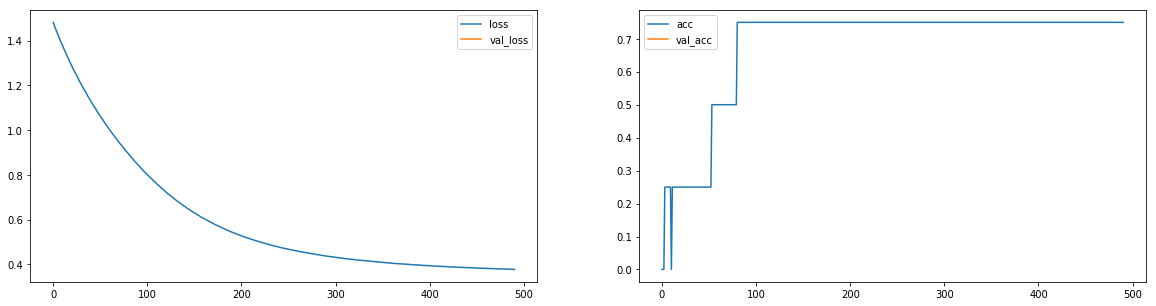

4/4 [==============================] - 0s - loss: 0.3779 - acc: 0.7500     
Epoch 492/500
4/4 [==============================] - 0s - loss: 0.3777 - acc: 0.7500         
Epoch 493/500
4/4 [==============================] - 0s - loss: 0.3776 - acc: 0.7500     
Epoch 494/500
4/4 [==============================] - 0s - loss: 0.3774 - acc: 0.7500         
Epoch 495/500
4/4 [==============================] - 0s - loss: 0.3775 - acc: 0.7500     
Epoch 496/500
4/4 [==============================] - 0s - loss: 0.3773 - acc: 0.7500         
Epoch 497/500
4/4 [==============================] - 0s - loss: 0.3777 - acc: 0.7500         
Epoch 498/500
4/4 [==============================] - 0s - loss: 0.3780 - acc: 0.7500     
Epoch 499/500
4/4 [==============================] - 0s - loss: 0.3769 - acc: 0.7500     
Epoch 500/500
4/4 [==============================] - 0s - loss: 0.3768 - acc: 0.7500         


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None)
model.fit(X,y, epochs=500, batch_size=1, verbose=1, callbacks=[plot_losses])

In [31]:
to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
print(to_predict)
predicted = model.predict(to_predict)
print(predicted)
print(indices_to_chars[np.argmax(predicted)])

[[[0 0 1 0]]]
[[ 0.01297768  0.00369497  0.50553054  0.47779688]]
L


In [80]:
to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
predicted = model.predict(to_predict)
iterat = 10
temp = 1 # 1, 0.5, 0.1, 0.01
for i in range(iterat):
    print(indices_to_chars[sample(predicted[0], temp)])

O
L
O
O
L
L
L
O
O
L


In [81]:
to_predict = chars_to_one_hot('HEL', chars, chars_to_indices, window_size)*1

In [82]:
to_predict.reshape(3,1,4)

array([[[0, 1, 0, 0]],

       [[1, 0, 0, 0]],

       [[0, 0, 1, 0]]])

In [83]:
predicted = model.predict(to_predict.reshape(3,1,4))

In [84]:
predicted

array([[ 0.96730185,  0.00576135,  0.01761472,  0.00932202],
       [ 0.01184521,  0.00295176,  0.95000321,  0.03519982],
       [ 0.01297768,  0.00369497,  0.50553054,  0.47779688]], dtype=float32)

## T = 2

In [85]:
window_size = 2
X_2, y_2 = encode_io_pairs(text, chars, window_size,step_size)

In [86]:
model_2 = Sequential()
model_2.add(SimpleRNN(10, input_shape=(2,len(chars))))
model_2.add(Dense(len(chars), activation="softmax"))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


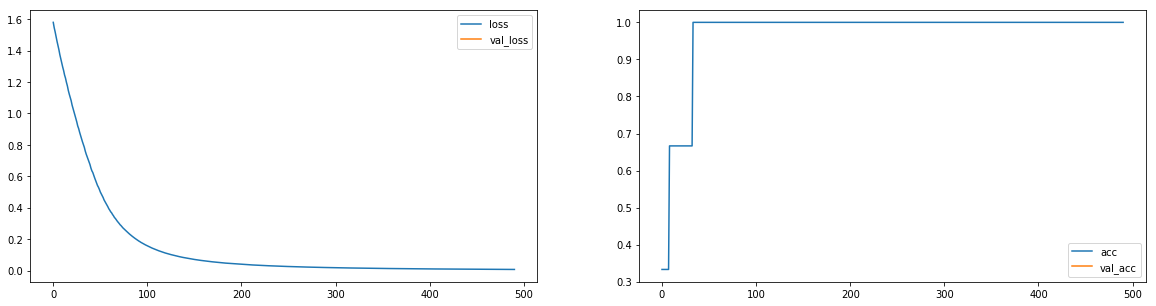

3/3 [==============================] - 0s - loss: 0.0068 - acc: 1.0000     
Epoch 492/500
3/3 [==============================] - 0s - loss: 0.0068 - acc: 1.0000     
Epoch 493/500
3/3 [==============================] - 0s - loss: 0.0067 - acc: 1.0000     
Epoch 494/500
3/3 [==============================] - 0s - loss: 0.0067 - acc: 1.0000     
Epoch 495/500
3/3 [==============================] - 0s - loss: 0.0067 - acc: 1.0000     
Epoch 496/500
3/3 [==============================] - 0s - loss: 0.0067 - acc: 1.0000     
Epoch 497/500
3/3 [==============================] - 0s - loss: 0.0066 - acc: 1.0000     
Epoch 498/500
3/3 [==============================] - 0s - loss: 0.0066 - acc: 1.0000     
Epoch 499/500
3/3 [==============================] - 0s - loss: 0.0066 - acc: 1.0000     
Epoch 500/500
3/3 [==============================] - 0s - loss: 0.0065 - acc: 1.0000     


In [87]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None)
model_2.fit(X_2,y_2, epochs=500, batch_size=1, verbose=1, callbacks=[plot_losses])

# Stateful RNN

In [88]:
batch_size=1
model_3 = Sequential()
model_3.add(SimpleRNN(10, batch_input_shape=(batch_size,1,len(chars)), stateful=True))
model_3.add(Dense(len(chars), activation="softmax"))
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (1, 10)                   150       
_________________________________________________________________
dense_3 (Dense)              (1, 4)                    44        
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
for i in range(300):
    model_3.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
    model_3.reset_states()

Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3816 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3694 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3592 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3492 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3392 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3294 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3195 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3097 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.3001 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.2906 - acc: 0.5000         
Epoch 1/1
4/4 [==============================] - 0s - loss: 1.2810 - acc: 0.5000         
Epoch 1/1


4/4 [==============================] - 0s - loss: 0.6134 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.6066 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5982 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5905 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5833 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5763 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5692 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5625 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5560 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5497 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.5435 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.53

4/4 [==============================] - 0s - loss: 0.2137 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.2119 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.2097 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.2078 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.2060 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.2043 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.2027 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.2012 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1997 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1983 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1968 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.19

4/4 [==============================] - 0s - loss: 0.1147 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1138 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1126 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1117 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1109 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1101 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1092 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1085 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1079 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1072 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.1064 - acc: 1.0000     
Epoch 1/1
4/4 [==============================] - 0s - loss: 0.10

# Voy ingresando de a uno

In [152]:
window_size=1
model_3.reset_states()
to_predict = chars_to_one_hot('H', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
indices_to_chars[np.argmax(predicted[0])]

[[ 0.86529064  0.026972    0.07149955  0.03623777]]


'E'

In [153]:
to_predict = chars_to_one_hot('E', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
indices_to_chars[np.argmax(predicted[0])]

[[ 0.13663808  0.01638401  0.84549522  0.00148269]]


'L'

In [154]:
to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
indices_to_chars[np.argmax(predicted[0])]

[[ 0.00436717  0.00143313  0.98304582  0.01115397]]


'L'

In [155]:
to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
indices_to_chars[np.argmax(predicted[0])]

[[ 0.00278973  0.00735226  0.0598331   0.93002492]]


'O'

Algunas pruebas mas

In [156]:
model_3.reset_states()
to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
indices_to_chars[np.argmax(predicted[0])]

[[ 0.19971915  0.05902244  0.19753617  0.54372221]]


'O'

In [167]:
model_3.reset_states()
to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
print(indices_to_chars[np.argmax(predicted[0])])

to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
print(indices_to_chars[np.argmax(predicted[0])])

[[ 0.19971915  0.05902244  0.19753617  0.54372221]]
O
[[ 0.25657901  0.06925783  0.02384104  0.65032208]]
O


In [165]:
# Interesante! HEL -> L, pero EL -> O (No es markov)
model_3.reset_states()
#to_predict = chars_to_one_hot('H', chars, chars_to_indices, window_size)*1
#predicted = model_3.predict(to_predict)
#print(predicted)
#print(indices_to_chars[np.argmax(predicted[0])])
to_predict = chars_to_one_hot('E', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
print(indices_to_chars[np.argmax(predicted[0])])
to_predict = chars_to_one_hot('L', chars, chars_to_indices, window_size)*1
predicted = model_3.predict(to_predict)
print(predicted)
print(indices_to_chars[np.argmax(predicted[0])])

[[ 0.05337804  0.01291359  0.81225371  0.1214546 ]]
L
[[ 0.01443067  0.01570051  0.12632035  0.84354842]]
O


# Pad sequences

https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/